In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\pkgam\Desktop\Basic ML\ML Model\height-weight.csv')

In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [8]:
###correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


Text(0, 0.5, 'Height')

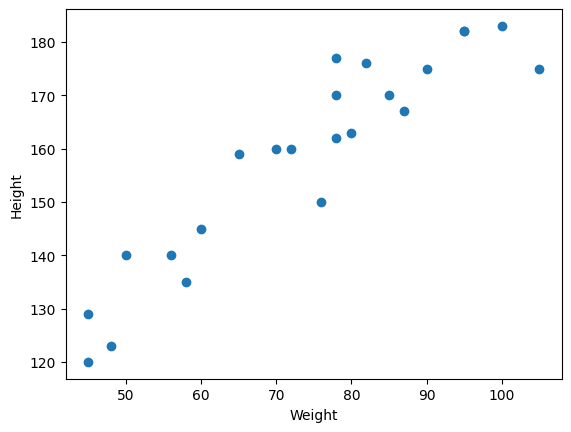

In [10]:
#scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [11]:
# independant and dependent variables
X = df[['Weight']]
y = df['Height']

In [12]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [14]:
##Standardization
from sklearn.preprocessing import StandardScaler


In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\pkgam\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [18]:
##Apply simple linear regression
from sklearn.linear_model import LinearRegression


In [20]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
regression.coef_, regression.intercept_

(array([17.2982057]), np.float64(156.47058823529412))

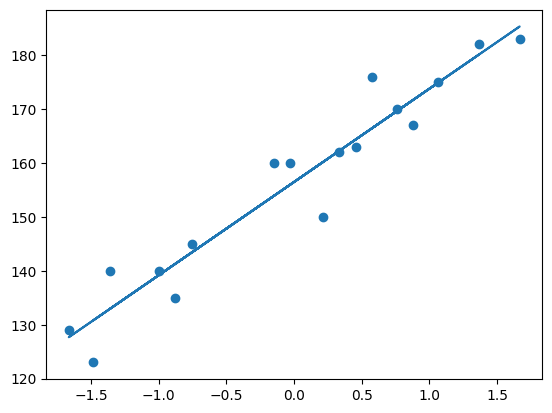

In [22]:
##plot the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train,regression.predict(X_train))

In [23]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [24]:
## Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1886933.5397307759
Mean Absolute Error: 1336.1312312741586


R-squared

r^2 = 1 - ssr/sst

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: -4335.393707648128


In [28]:
## OLS linear regression
%pip install statsmodels
import statsmodels.api as sm


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.8 MB 16.8 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.8 MB 9.1 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.8 MB 10.2 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 8.6 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 7.7 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 6.0 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 5.3 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 4.9 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.2 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------

In [29]:
model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(model.summary())
print(prediction)

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 05 Jun 2025   Prob (F-statistic):                       0.664
Time:                        16:15:53   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\pkgam\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [30]:
## prediction of new data
regression.predict([[72]])

array([1401.94139895])